# 364.013-23, 364.070
# Introduction to Computer Vision and Deep Learning

<h2>Table of outlines</h2>
<ol>
    <a href="#Basics of image processing"><li style="font-size:large;font-weight:bold">Basics of image processing</li></a>
    <ol style="margin-bottom:15px">
        <a href="#Read, Display, Save, images"><li style="font-size:medium">Read, Display, Save, Images</li></a>
        <a href="#Convert to gray scale"><li style="font-size:medium">Convert to Gray Scale</li></a>
        <a href="#Filters"><li style="font-size:medium">Filters</li></a>
    </ol>
    <a href="#Deep learning"><li style="font-size:large;font-weight:bold">Deep learning</li></a>
    <ol style="margin-bottom:15px">
        <a href="#Basics of Deep learning"><li style="font-size:medium">Basics of Deep learning</li></a>
        <a href="#Build some CNN architecture"><li style="font-size:medium">Build some CNN Architecture</li></a>

## Computer Vision Section
So you have learned how to manipulate matrices with numpy and some basic image processing with scikit-image processing package. 

Today we would look into OpenCV (Open source Computer Vision library), use it for a couple of cool image processing application and than demonstrate how to use it for a  computer vision applications.

First we import necessary libraries

You have to install OpenCV-Python version using 

> `pip install opencv-python`

Run these commands on your terminal or if you are using Anaconda Navigator – Jupyter Notebook, you can change “pip” with the “conda” command and install the same.

A detailed overview for opencv [installation](https://docs.opencv.org/master/d0/d3d/tutorial_general_install.html) is provided. You could also get useful information for [python installation](https://pypi.org/project/opencv-python/) here.

It also has extensive [documentation](https://docs.opencv.org/master/) and [tutorials](https://docs.opencv.org/master/d9/df8/tutorial_root.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import PIL

## Importing the Open-CV library
***import cv2***

For detailed description, you could always rely on `help`

## Computer vision basics

In [2]:
#%matplotlib notebook
from io import BytesIO
from IPython.display import clear_output, Image as NoteImage, display
def imshow(im,fmt='jpeg'):
    #a = np.uint8(np.clip(im, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(im).save(f, fmt)
    display(NoteImage(data=f.getvalue()))

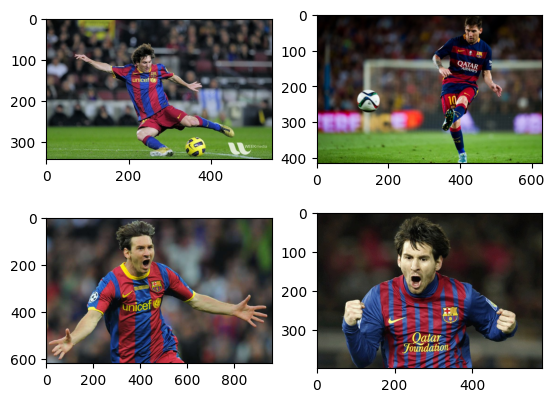

In [3]:
# Read images
##Read images using imread function and convert color space using cvtColor
messi1 = cv2.imread("images/messi.jpg")
messi1 = cv2.cvtColor(messi1,cv2.COLOR_BGR2RGB)

messi2 = cv2.cvtColor(cv2.imread("images/messi2.jpg"),cv2.COLOR_BGR2RGB)
messi3 = cv2.cvtColor(cv2.imread("images/messi3.jpg"),cv2.COLOR_BGR2RGB)
messi4 = cv2.cvtColor(cv2.imread("images/messi4.jpg"),cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(2,2)
ax[0,0].imshow(messi1)
ax[0,1].imshow(messi2)
ax[1,0].imshow(messi3)
ax[1,1].imshow(messi4)
plt.show()

In [4]:
print('the size of image 1 ==>> ',messi1.shape)
print('the size of image 2 ==>> ',messi2.shape)
print('the size of image 3 ==>> ',messi3.shape)
print('the size of image 4 ==>> ',messi4.shape)

the size of image 1 ==>>  (342, 548, 3)
the size of image 2 ==>>  (415, 630, 3)
the size of image 3 ==>>  (620, 960, 3)
the size of image 4 ==>>  (400, 580, 3)


In [5]:
# to save image
im = messi2
filename = 'saved_NewIm'
fmt='jpeg'
full_name = filename + '.'+ fmt

#PIL.Image.fromarray(im).save('ye_de.jpeg')
PIL.Image.fromarray(im).save(full_name)

### RGB

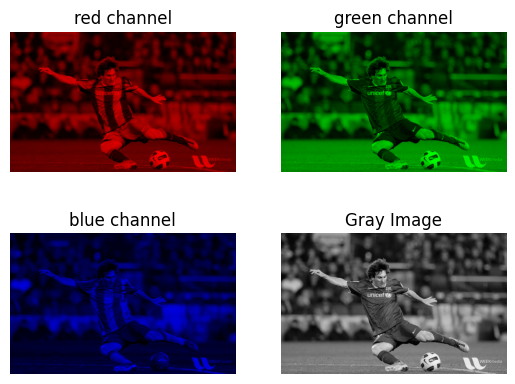

In [6]:
r,g,b = messi1[:,:,0], messi1[:,:,1], messi1[:,:,2]
gray_messi1 = cv2.cvtColor(messi1, cv2.COLOR_RGB2GRAY)


r_tmp = np.zeros(messi1.shape, dtype='uint8')
r_tmp[:, :, 0] = r

g_tmp = np.zeros(messi1.shape, dtype='uint8')
g_tmp[:, :, 1] = g

b_tmp = np.zeros(messi1.shape, dtype='uint8')
b_tmp[:, :, 2] = b


fig, ax = plt.subplots(2,2)
ax[0,0].imshow(r_tmp)
ax[0,0].axis('off')
ax[0,0].set_title('red channel')

ax[0,1].imshow(g_tmp)
ax[0,1].axis('off')
ax[0,1].set_title('green channel')

ax[1,0].imshow(b_tmp)
ax[1,0].axis('off')
ax[1,0].set_title('blue channel')

ax[1,1].imshow(gray_messi1, cmap='gray')
ax[1,1].set_title('Gray Image')
ax[1,1].axis('off')
plt.show()

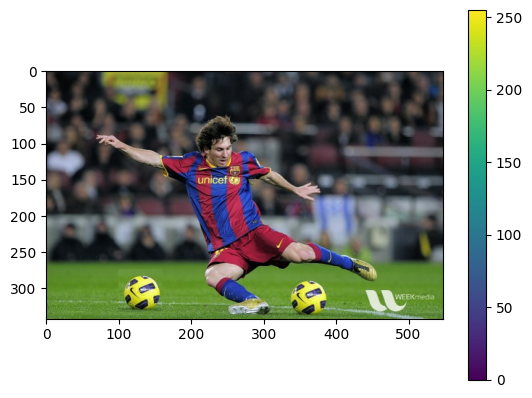

In [7]:
ball = messi1[280:340, 330:390]
messi1[273:333, 100:160] = ball

plt.imshow(messi1)
plt.colorbar()
plt.show()

### Reshape

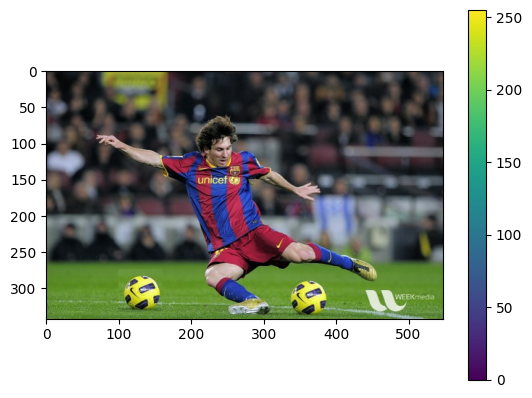

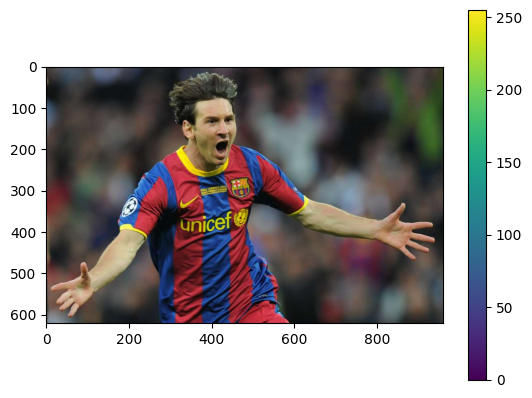

In [8]:
plt.imshow(messi1)
plt.colorbar()
plt.show()

plt.imshow(messi3)
plt.colorbar()
plt.show()

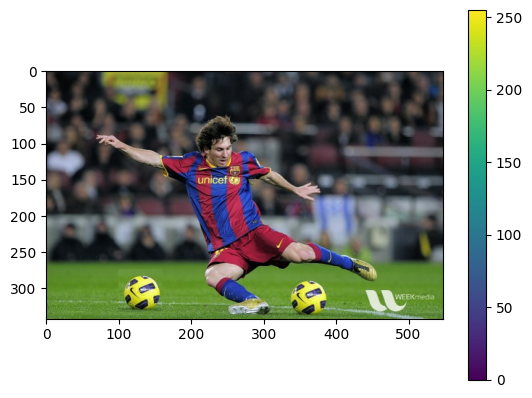

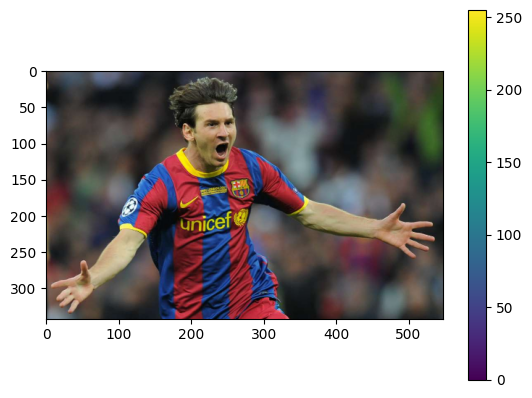

In [9]:
messi3 = cv2.resize(messi3,(messi1.shape[1],messi1.shape[0]))

plt.imshow(messi1)
plt.colorbar()
plt.show()

plt.imshow(messi3)
plt.colorbar()
plt.show()

## Filters

<a name="Steps of applying filter"></a><h3 style="color:rgb(0,120,170)">Steps of applying filter</h3>
<img src="images/convolution.jpg" alt="Image not found!"/>

Types of filters:
- **low pass filter**
- **median pass filter**
- **high pass filter**

### Noise
Noise in Image is another function that is combined with the original function to get a image

- **Salt and pepper noise**: random occuences of black and white pixels
- **Impulse noise**: random occurrences of white pixels
- **Gaussian noise**: variations in intensity drawn from a Gaussian normal distribution

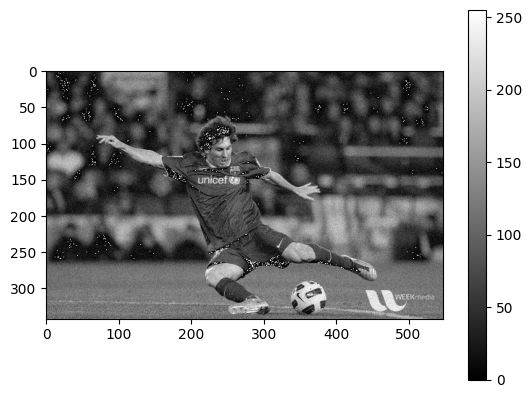

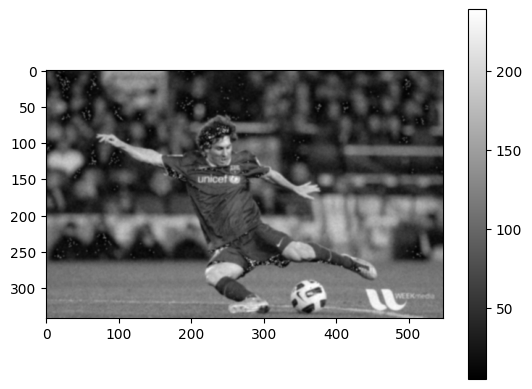

In [10]:
mu, sigma = 0, 8
noise = np.random.normal(mu, sigma, gray_messi1.shape)

gausi = np.uint8(gray_messi1 + noise)
plt.imshow(gausi, cmap='gray')
plt.colorbar()
plt.show()

# you can also use gaussian filter function from scipy.
from scipy.ndimage import gaussian_filter
blurred = gaussian_filter(gausi, sigma=1)
plt.imshow(blurred, cmap='gray')
plt.colorbar()
plt.show()


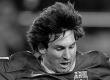

In [11]:
face_messi1 = gray_messi1[60:140, 180:290]
imshow(face_messi1)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


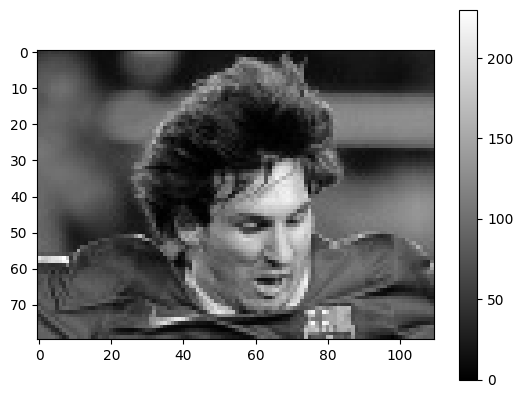

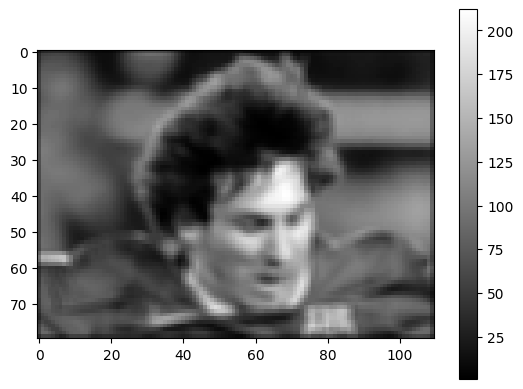

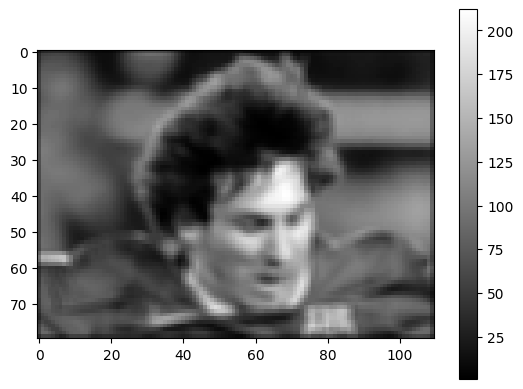

In [12]:
from scipy.ndimage import convolve, correlate

kernal_1 = 1.0/9.0*np.ones((3,3))
print(kernal_1)
conv = convolve(face_messi1, kernal_1, mode='constant')
corr = correlate(face_messi1, kernal_1, mode='constant')
#imshow(face_messi1)
#imshow(conv)
#imshow(corr)

plt.imshow(face_messi1, cmap='gray')
plt.colorbar()
plt.show()

plt.imshow(conv, cmap='gray')
plt.colorbar()
plt.show()

plt.imshow(corr, cmap='gray')
plt.colorbar()
plt.show()

<img src="images/conv.png" />

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


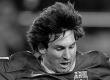

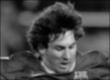

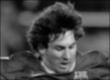

In [13]:
kernal_2 = np.array([[1,2,1],[2,4,2],[1,2,1]])/16.0
print(kernal_2)
conv = convolve(face_messi1, kernal_2, mode='constant')
corr = correlate(face_messi1, kernal_2, mode='constant')

imshow(face_messi1)
imshow(conv)
imshow(corr)

[[0.16666667 0.16666667 0.16666667]
 [0.         0.         0.        ]
 [0.16666667 0.16666667 0.16666667]]


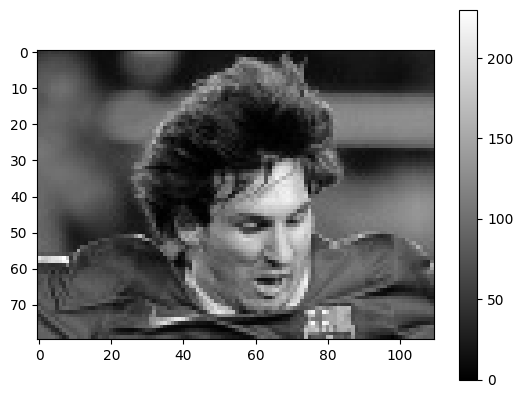

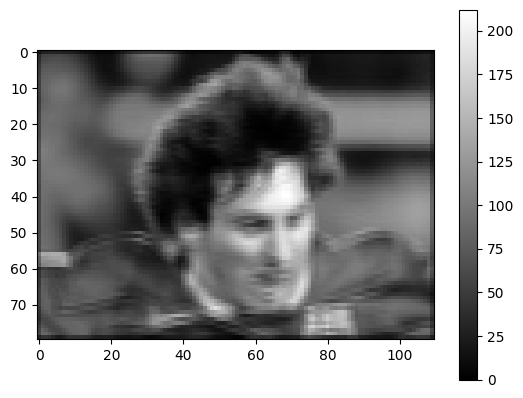

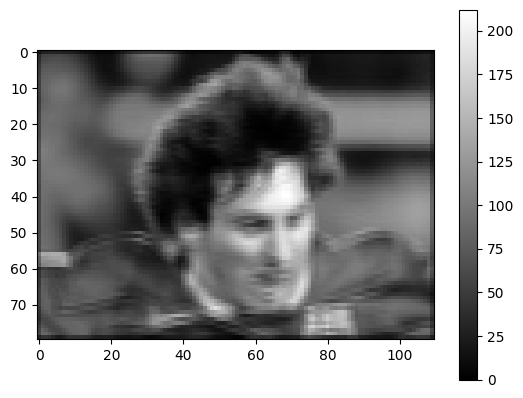

In [14]:
kernal_3 = np.array([[1,1,1],[0,0,0],[1,1,1]])/6.0

print(kernal_3)
conv = convolve(face_messi1, kernal_3, mode='constant')
corr = correlate(face_messi1, kernal_3, mode='constant')

plt.imshow(face_messi1, cmap='gray')
plt.colorbar()
plt.show()

plt.imshow(conv, cmap='gray')
plt.colorbar()
plt.show()

plt.imshow(corr, cmap='gray')
plt.colorbar()
plt.show()

### Median Filter

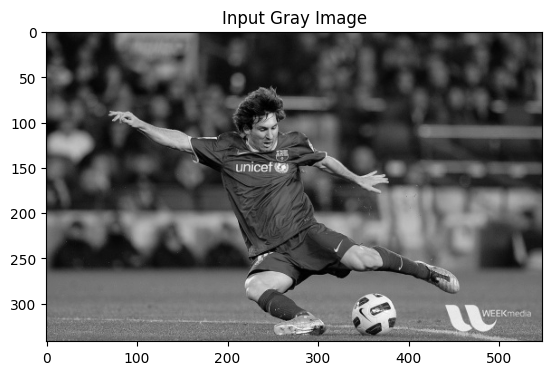

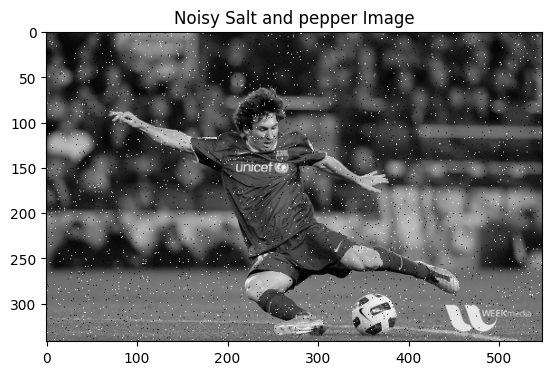

In [15]:
plt.imshow(gray_messi1, cmap='gray')
plt.title('Input Gray Image')
plt.show()

prob = 0.01
rnd = np.random.rand(gray_messi1.shape[0], gray_messi1.shape[1])
noisy = (gray_messi1/255.0).copy()
noisy[rnd < prob] = 0
noisy[rnd > 1 - prob] = 1
    
salty = np.uint8(noisy*255)

plt.imshow(salty, cmap='gray')
plt.title('Noisy Salt and pepper Image')
plt.show()

To solve this salt and pepper noise, median filter is applied as the following:

<img src="images/median_Operation.png" />

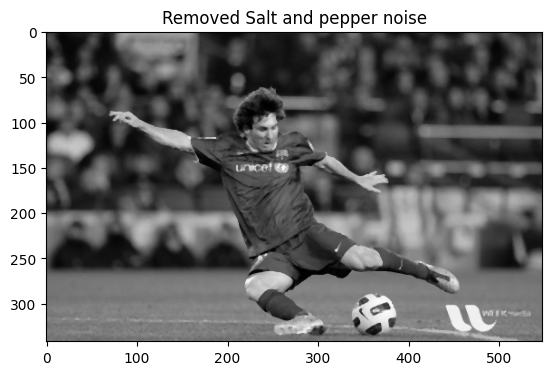

In [16]:
from scipy.ndimage import median_filter

plt.imshow(median_filter(salty,(3,3)), cmap='gray')
plt.title('Removed Salt and pepper noise')
plt.show()

### High pass Filter

[[-0.125  0.     0.125]
 [-0.25   0.     0.25 ]
 [-0.125  0.     0.125]]
<class 'numpy.dtypes.UInt8DType'>


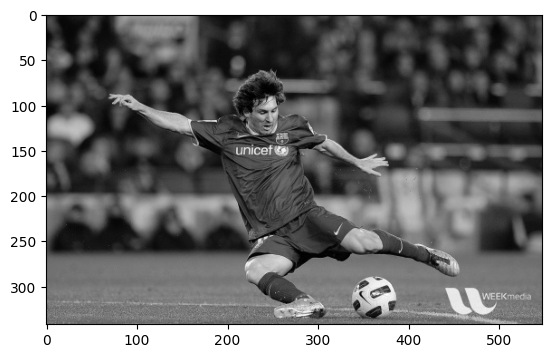

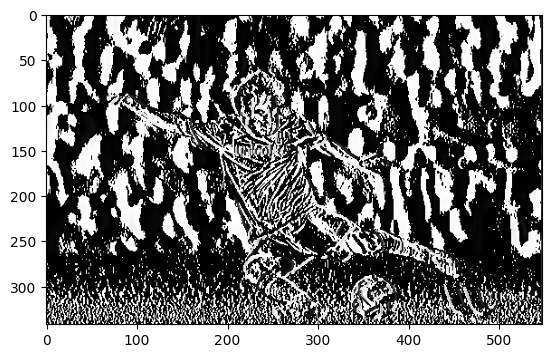

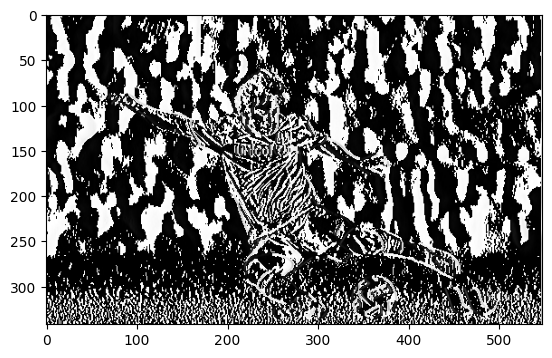

In [17]:
kernal_4 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])/8.0
print(kernal_4)

print(type(gray_messi1.dtype))

gray_messi1 = gray_messi1.astype(np.float32)
#gray_messi1 = np.float32(gray_messi1)
conv = convolve(gray_messi1, kernal_4, mode='constant')
corr = correlate(gray_messi1, kernal_4, mode='constant')

gray_messi1 = gray_messi1.astype(np.uint8)
conv = np.uint8(conv)
corr = np.uint8(corr)

plt.imshow(gray_messi1, cmap='gray')
plt.show()

plt.imshow(conv, cmap='gray')
plt.show()

plt.imshow(corr, cmap='gray')
plt.show()

Types of high pass filter:
- **sobel**
- **prewitt**
- **roberts**

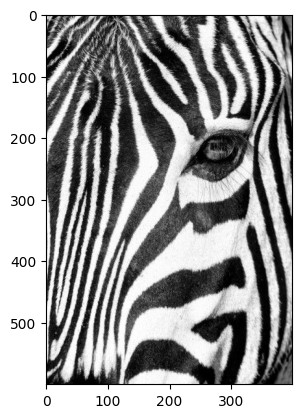

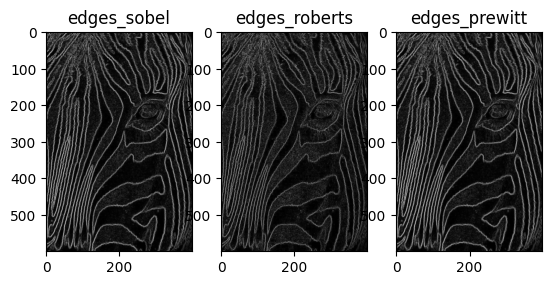

In [18]:
from skimage import filters
zebra = cv2.imread("images/zebra.jpg")
zebra = cv2.cvtColor(zebra, cv2.COLOR_RGB2GRAY)

zebra = zebra.astype(np.float64)

edges_sobel = filters.sobel(zebra)

edges_roberts = filters.roberts(zebra)

edges_prewitt = filters.prewitt(zebra)

zebra = zebra.astype(np.uint8)
#zebra = np.uint8(zebra)
edges_sobel = np.uint8(edges_sobel)
edges_roberts = np.uint8(edges_roberts)
edges_prewitt = np.uint8(edges_prewitt)


plt.imshow(zebra, cmap='gray')
plt.show()

fig, ax = plt.subplots(1,3)

ax[0].imshow(edges_sobel, cmap='gray')
ax[0].set_title('edges_sobel')

ax[1].imshow(edges_roberts, cmap='gray')
ax[1].set_title('edges_roberts')

ax[2].imshow(edges_prewitt, cmap='gray')
ax[2].set_title('edges_prewitt')

plt.show()



## Hough Transform for Lines

In [19]:
def find_lines(img,minLineLength=5,maxLineGap=300,rho = 1,canny_t=(50,200),top=15):
    img2 = img.copy()
    
    gimg2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gimg2 = cv2.GaussianBlur(gimg2, (11,11), 0)  # apply Gaussian filter to remove small edges

    
    edges = cv2.Canny(gimg2,canny_t[0],canny_t[1],apertureSize =3)
    
    plt.imshow(edges, cmap='gray')
    plt.show()

    lines = cv2.HoughLinesP(edges,
                           rho = rho,
                           theta = np.pi/180,threshold = 100,
                           minLineLength = minLineLength,
                           maxLineGap = maxLineGap)
    
    for line in lines:
        x1, y1, x2, y2 = line[0]
        if (y1 > 400 or y2 > 400): #Filter out the lines in the top of the image
            cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
            
    plt.imshow(img)

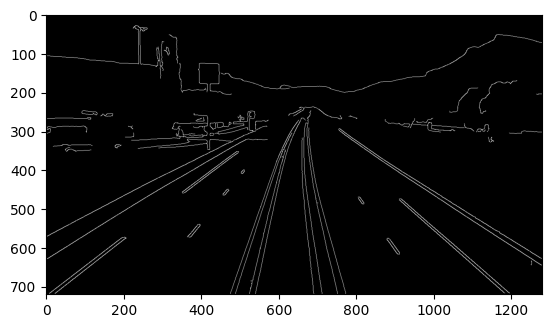

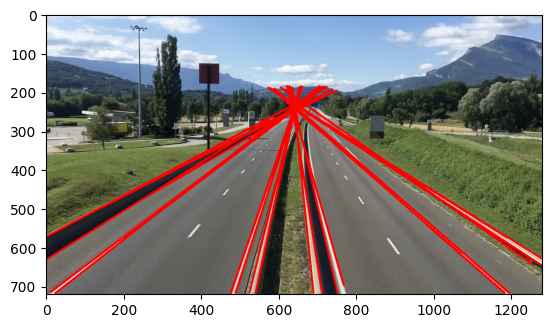

In [20]:
road = cv2.cvtColor(cv2.imread("images/filtered_road.jpg"),cv2.COLOR_BGR2RGB)  #road_image.jpg

find_lines(road)

In [21]:
def find_circles(img, minDist=100,accValue=200):
    output = img.copy()
    
    grayim = cv2.cvtColor(output, cv2.COLOR_RGB2GRAY)

        
    circles = cv2.HoughCircles(grayim, cv2.HOUGH_GRADIENT, accValue, minDist)
    # ensure at least some circles were found
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")

        # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(output, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

        # show the output image
        imshow(np.hstack([output]))

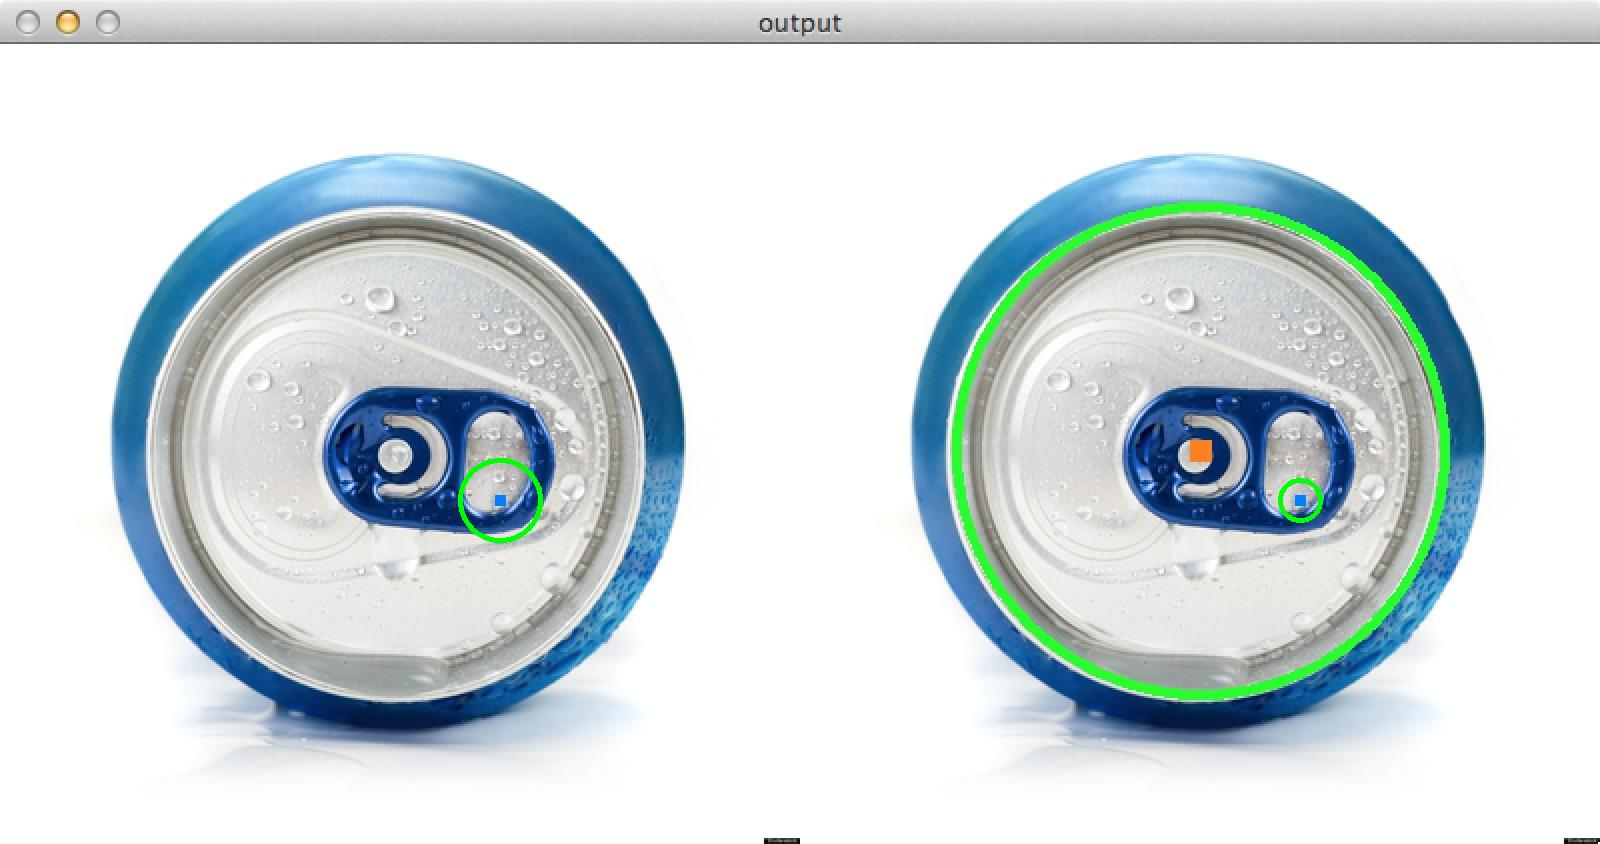

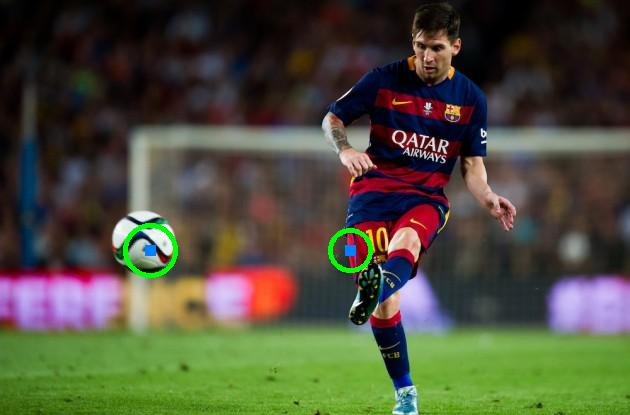

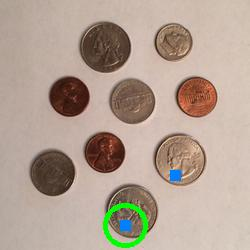

In [22]:
soda = cv2.cvtColor(cv2.imread("images/detect_circles_soda.jpg"),cv2.COLOR_BGR2RGB)
find_circles(soda)

messi2 = cv2.cvtColor(cv2.imread("images/messi2.jpg"),cv2.COLOR_BGR2RGB)
find_circles(messi2,2,100)

coins = cv2.cvtColor(cv2.imread("images/coins.png"),cv2.COLOR_BGR2RGB)
find_circles(coins,5,50)

## Harries Corner

## Machine Learning Section

<img src="images/into.gif" alt="Image not found!"/> 


## Deep Learning Terminology
<a name="padding_strides"></a><h3 style="color:rgb(0,120,170)">padding_strides</h3>
<img src="images/padding_strides.gif" alt="Image not found!"/>
<a name="con_Filter"></a><h3 style="color:rgb(0,120,170)">Convolution filter</h3>
<img src="images/con_Filter.gif" alt="Image not found!"/>
<a name="stride 1 operation"></a><h3 style="color:rgb(0,120,170)">stride 1 operation</h3>
<img src="images/stride_1.jpg" alt="Image not found!"/>
<a name="stride 2 operation"></a><h3 style="color:rgb(0,120,170)">stride 2 operation</h3>
<img src="images/stride_2.jpg" alt="Image not found!"/>
<a name="Pooling operation"></a><h3 style="color:rgb(0,120,170)">Pooling operation</h3>
<img src="images/pooling.jpg" alt="Image not found!"/>

In [25]:
import torch
import time

print("Using torch", torch.__version__)

Using torch 2.9.0+cpu


In [26]:
# Create a tensor from a (nested) list
x = torch.Tensor([[1, 2], [3, 4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [27]:
# Create a tensor with random values between 0 and 1 with the shape [2, 3, 4]
x = torch.Tensor(2, 3, 4)
print(x)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


We can obtain the shape of a tensor in the same way as in numpy (x.shape), or using the .size method:

In [28]:
shape = x.shape
print("Shape:", x.shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

Shape: torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


## Tensor to Numpy, and Numpy to Tensor
Tensors can be converted to numpy arrays, and numpy arrays back to tensors. To transform a numpy array into a tensor, we can use the function ***torch.from_numpy***

In [29]:
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


To transform a PyTorch tensor back to a numpy array, we can use the function ***.numpy()*** on tensors:

In [30]:
tensor = torch.arange(4)
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


## Indexing
We have the situation where we need to select a part of a tensor. Indexing works just like in numpy, so let’s try it:

In [ ]:
x = torch.arange(12).view(3, 4)
print("X", x)

In [ ]:
print(x[:, 1])   # Second column

print(x[0])      # First row

print(x[:2, -1]) # First two rows, last column

print(x[1:3, :]) # Middle two rows

In [ ]:
import torch
import torch.nn as nn
import torchvision
import os
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cpu')
print(device)

batch_size = 16

In [ ]:
if not os.path.exists('data_Lab2'): os.mkdir('data_Lab2')

## Working with the MNIST Dataset

[From TorchVision](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html)

<a name="Example-of-MNIST-Dataset"></a><h3 style="color:rgb(0,120,170)">Example of MNIST Dataset</h3>
<img src="images/Example-of-MNIST-Dataset.png" alt="Image not found!"/>

In [ ]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.5],std=[0.5]),
])

In [ ]:
dataset_train = torchvision.datasets.MNIST(root='data_Lab2', train=True, download=True, transform=transform)
dataset_train
# print(len(dataset_train))

In [ ]:
train_set, val_set = torch.utils.data.random_split(dataset_train, [0.8, 0.2], generator=torch.Generator().manual_seed(1234))
print(len(train_set))
print(len(val_set))

In [ ]:
dataset_test = torchvision.datasets.MNIST(root='data_Lab2', train=False, download=True, transform=transform)
dataset_test

In [ ]:
train_loader = torch.utils.data.DataLoader( train_set, batch_size=batch_size, shuffle= True)

val_loader = torch.utils.data.DataLoader( val_set, batch_size=batch_size, shuffle= False)

test_loader = torch.utils.data.DataLoader( dataset_test, batch_size=batch_size, shuffle= False)

## Build Vgg16

<img src="images/vgg16_Det.jpg" />
<img src="images/vgg16_Arct.jpg" />

In [ ]:
class VGG16_original(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer8 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer9 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer10 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer11 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer12 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer13 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(7*7*512, 4096),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(4096, num_classes))
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.layer9(out)
        out = self.layer10(out)
        out = self.layer11(out)
        out = self.layer12(out)
        out = self.layer13(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [ ]:
class VGG16(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(14*14*64, 128),
            nn.ReLU())
        self.fc1= nn.Sequential(
            nn.Linear(128, num_classes))
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        return out

In [ ]:
model = VGG16().to(device)
print(model)

In [ ]:
input = torch.randn(1, 1, 28, 28, requires_grad=False).to(device)
output = model(input)
print(output.shape)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)  

In [ ]:
# training loop
num_epochs = 2
total_step = len(train_loader)
for epoch in range(num_epochs):
    model.train()
    for i, (images, labels) in enumerate(train_loader):  
        # Take the Tensors onto the device
        images = images.to(device)
        labels = labels.to(device)

        # import time
        # time.sleep(3) 
        # Final = torchvision.transforms.functional.to_pil_image(images[0])
        # Final.show()
        
        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            
    # Validation
    model.eval()
    total, correct = 0, 0
    with torch.no_grad():
        correct,total, count_total_imags = 0,0,0
        
        for i, (images, labels) in enumerate(val_loader):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            del images, labels, outputs
            count_total_imags = i * batch_size
        print('Accuracy of the model on the {} validation images: {} %'.format(count_total_imags, 100 * correct / total))
        torch.save(model.state_dict(), "model.pth")

In [ ]:
# Test model
model.load_state_dict(torch.load("model.pth", map_location=torch.device('cpu')) )

In [ ]:
# Test
model.eval()
    
# we need two lists to keep track of class-wise accuracy
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

print('Test')
valid_running_correct, counter, valid_running_loss = 0, 0, 0.0

true_label, predict_label= [], []
with torch.no_grad():
    for i, data in enumerate(test_loader):
        counter += 1
            
        image, labels = data[0].to(device), data[1].to(device)
        true_label += labels

        # forward pass
        outputs = model(image)

        # calculate the accuracy
        _, preds = torch.max(outputs.data, 1)
        predict_label += preds
        
        valid_running_correct += (preds == labels).sum().item()

        # calculate the accuracy for each class
        correct  = (preds == labels).squeeze()
        for i in range(len(preds)):
            label = labels[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1
        
epoch_acc = 100. * (valid_running_correct / len(test_loader.dataset))
count_total_imags = len(test_loader.dataset)
print('Accuracy of the model on the {} test images: {} %'.format( count_total_imags, epoch_acc))

print('\n')
for i in range(10):
    print(f"Accuracy of digit {i}: {100*class_correct[i]/class_total[i]}")
   
print("valid_running_correct",valid_running_correct)

list_true = [t.cpu().numpy() for t in true_label]
list_predict = [t.cpu().numpy() for t in predict_label]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(list_true, list_predict)
print("Accuracy:", f"{accuracy * 100:.2f}%")

In [ ]:
cm = confusion_matrix(list_true, list_predict)
print(cm)